In [1]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv ("Desktop/metis_shtuff/dataacquisition.csv")
df = df.drop("Unnamed: 0", 1)

#drop outliers/impossible data
df = df.drop([972,973,975,1003])
df = df.drop([1022])
df = df.drop([831,955,1001])
df = df.drop([182,15,79,187,201,239,443,465])

#reset index as rankings
df[""] = df["TARanking"]
df = df.set_index("")
df

,RestaurantName,Review,TARanking,NameLength,Avg$PerPax,NumOfReviews,Photos,ZipCode,Claimed,Michelin,TravellersChoice,ReserveOnTA
,,,,,,,,,,,,
1,The Courtyard,4.5,1,13,4.0,1420,863,49178.0,True,False,True,True
2,Entre-Nous creperie,5.0,2,19,2.5,1479,486,188383.0,True,False,True,False
3,Portman's Bar,5.0,3,13,4.0,248,272,39594.0,True,False,False,False
4,Paulaner Bräuhaus Singapore,4.5,4,27,2.5,1036,473,39596.0,True,False,True,True
5,Grand Shanghai Restaurant,5.0,5,25,2.5,619,533,169662.0,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Tuan Yuan Pork Ribs Soup,4.5,1045,24,2.5,49,70,160127.0,True,False,False,True
1047,Old Cheng Du,4.0,1047,12,2.5,97,110,59239.0,False,False,False,True
1048,The Square @ Furama,3.5,1048,19,2.5,218,173,169633.0,False,False,False,True


In [8]:
df.head()
#TARanking will be our target

,RestaurantName,Review,TARanking,NameLength,Avg$PerPax,NumOfReviews,Photos,ZipCode,Claimed,Michelin,TravellersChoice,ReserveOnTA
,,,,,,,,,,,,
1,The Courtyard,4.5,1,13,4.0,1420,863,49178.0,True,False,True,True
2,Entre-Nous creperie,5.0,2,19,2.5,1479,486,188383.0,True,False,True,False
3,Portman's Bar,5.0,3,13,4.0,248,272,39594.0,True,False,False,False
4,Paulaner Bräuhaus Singapore,4.5,4,27,2.5,1036,473,39596.0,True,False,True,True
5,Grand Shanghai Restaurant,5.0,5,25,2.5,619,533,169662.0,True,False,True,False


In [9]:
#drop na and restaurantname, not important for now
df = df.drop(['RestaurantName'], axis = 1)
df = df.dropna()
df.head()

,Review,TARanking,NameLength,Avg$PerPax,NumOfReviews,Photos,ZipCode,Claimed,Michelin,TravellersChoice,ReserveOnTA
,,,,,,,,,,,
1,4.5,1,13,4.0,1420,863,49178.0,True,False,True,True
2,5.0,2,19,2.5,1479,486,188383.0,True,False,True,False
3,5.0,3,13,4.0,248,272,39594.0,True,False,False,False
4,4.5,4,27,2.5,1036,473,39596.0,True,False,True,True
5,5.0,5,25,2.5,619,533,169662.0,True,False,True,False


In [10]:
train, test = train_test_split(df, test_size=0.3)

In [11]:
train.head()

,Review,TARanking,NameLength,Avg$PerPax,NumOfReviews,Photos,ZipCode,Claimed,Michelin,TravellersChoice,ReserveOnTA
,,,,,,,,,,,
566,4.5,566,28,2.5,65,76,257854.0,True,False,True,True
444,4.0,444,28,2.5,432,300,218591.0,True,True,False,True
965,4.0,965,28,2.5,102,30,179030.0,True,False,False,False
107,4.5,107,4,4.0,884,1218,178882.0,True,False,True,True
464,4.5,464,10,2.5,207,74,229457.0,True,False,False,True


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 566 to 136
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Review            690 non-null    float64
 1   TARanking         690 non-null    int64  
 2   NameLength        690 non-null    int64  
 3   Avg$PerPax        690 non-null    float64
 4   NumOfReviews      690 non-null    int64  
 5   Photos            690 non-null    int64  
 6   ZipCode           690 non-null    float64
 7   Claimed           690 non-null    bool   
 8   Michelin          690 non-null    bool   
 9   TravellersChoice  690 non-null    bool   
 10  ReserveOnTA       690 non-null    bool   
dtypes: bool(4), float64(3), int64(4)
memory usage: 45.8 KB


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


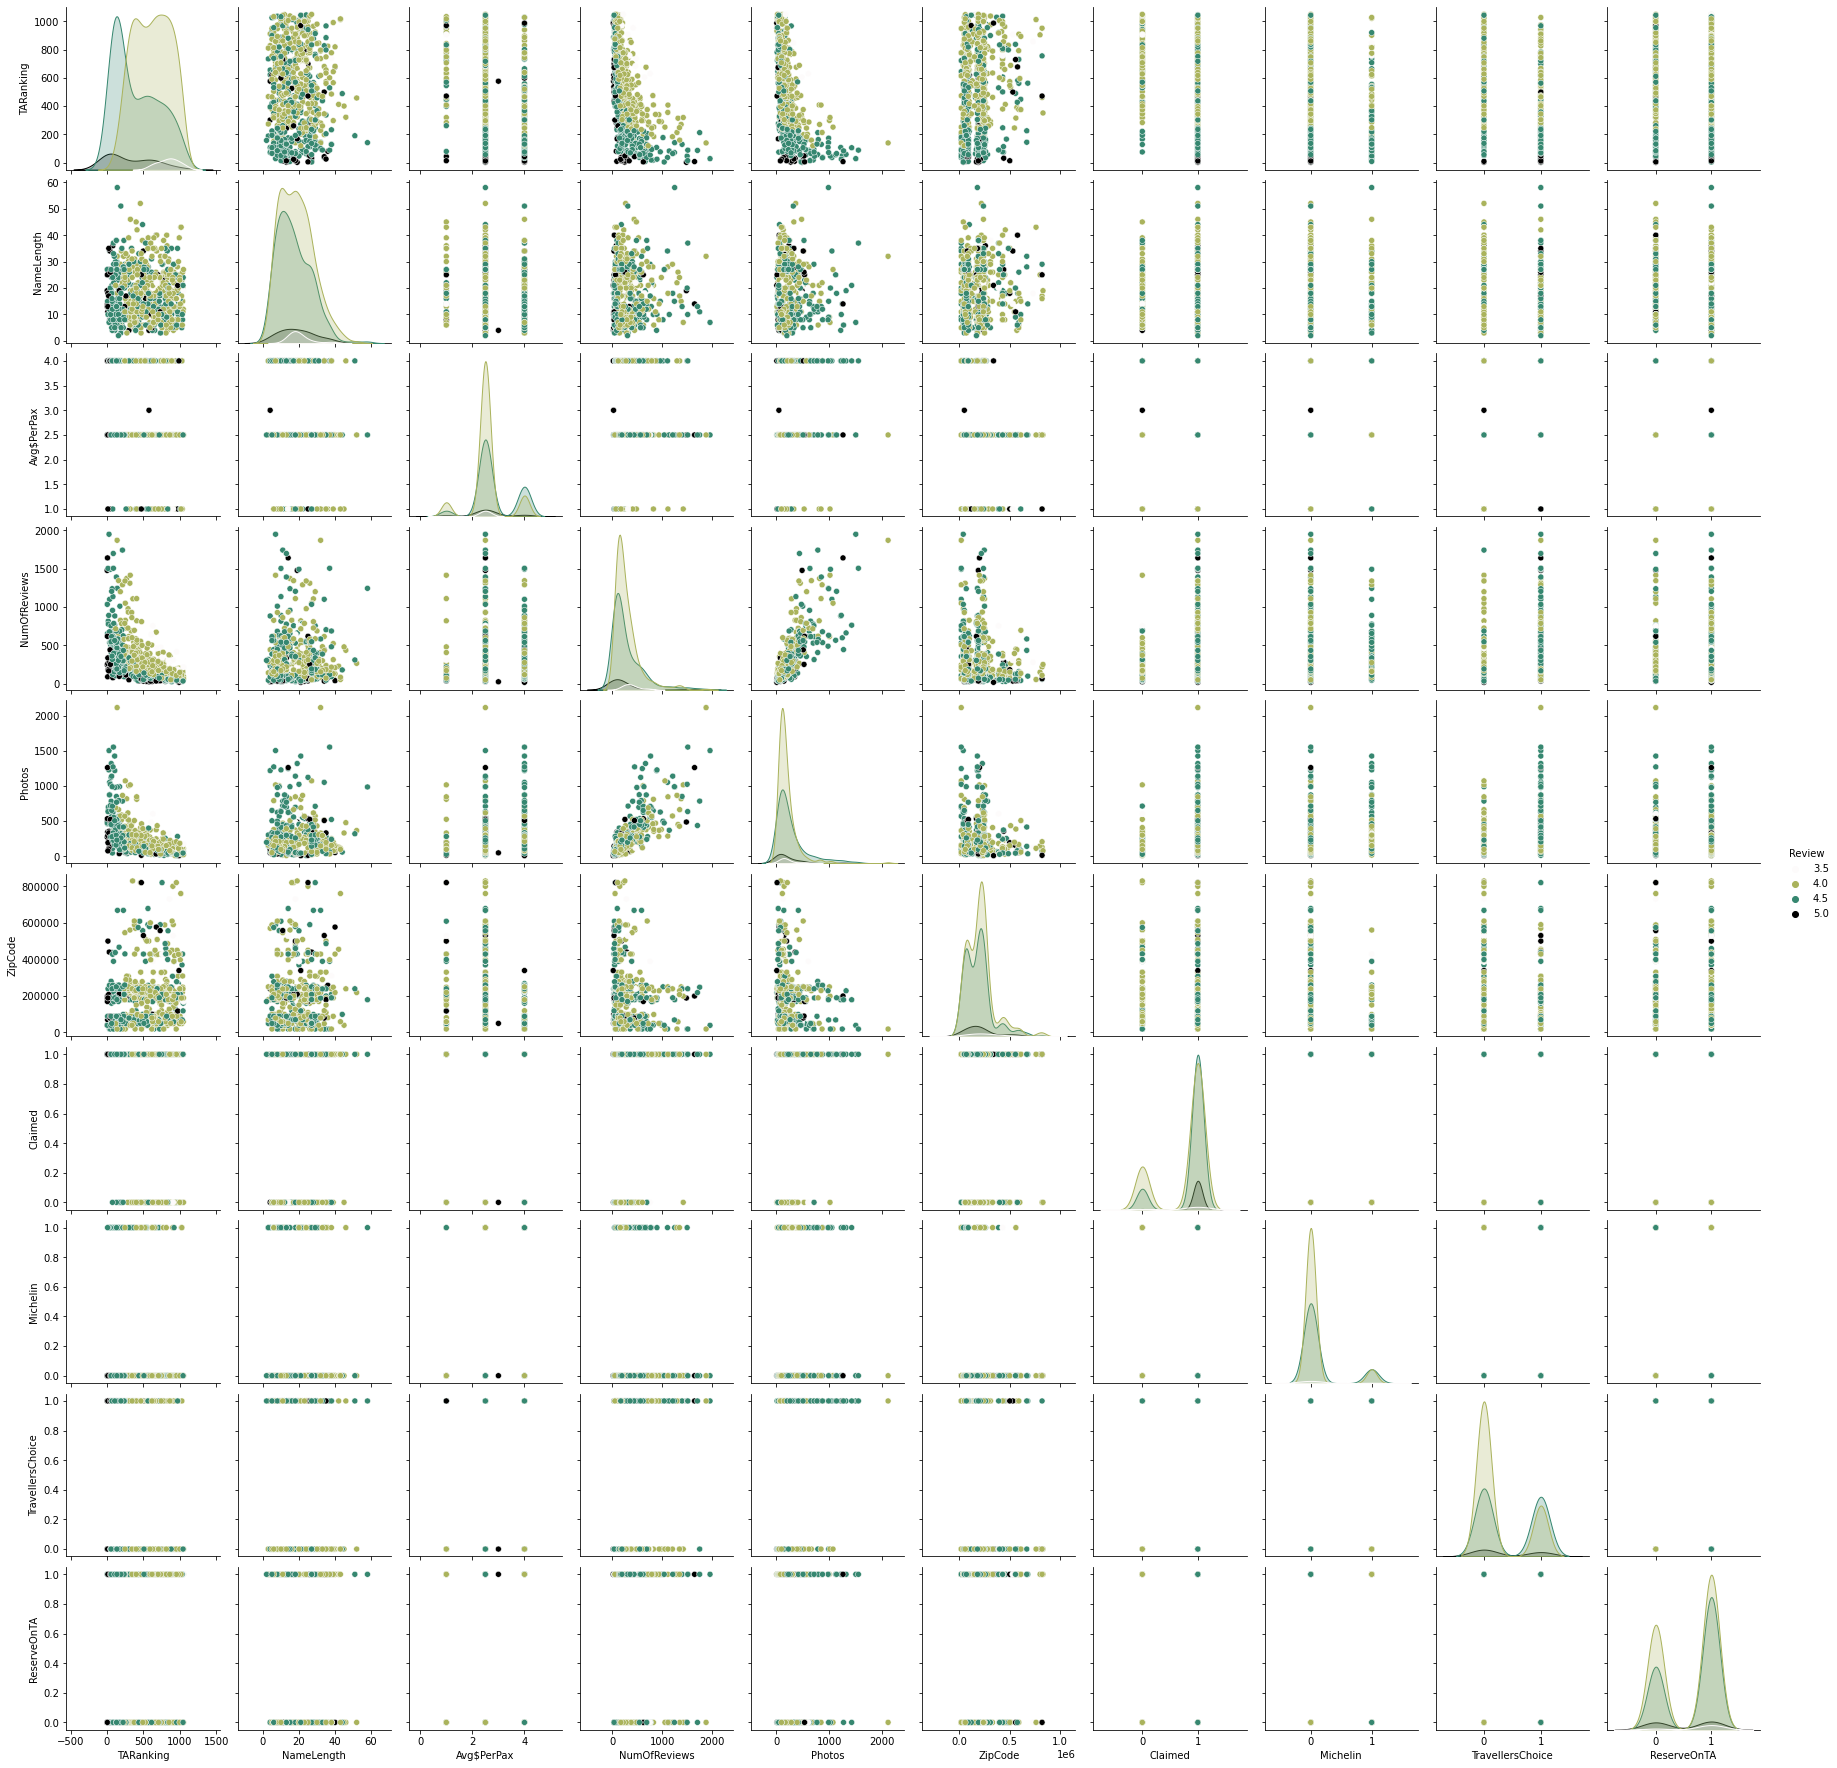

In [13]:
sns.pairplot(train, hue = "Review", palette = "gist_earth_r")

In [14]:
# slice data into features and target
X = train.drop(columns = ["TARanking"]).astype(float) 
X = sm.add_constant(X)
y = train.loc[:, "TARanking"].astype(float) 

# fit model with target
model = sm.OLS(y, X, data = train) 

# fit our model 
results = model.fit()
 
# summarize our model 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              TARanking   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     87.78
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          2.66e-115
Time:                        21:50:54   Log-Likelihood:                -4627.4
No. Observations:                 690   AIC:                             9277.
Df Residuals:                     679   BIC:                             9327.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2177.6179    113.253     19.228      0.000    1955.249    2399.987
Review            -322.3323     25.701    -12.542      0.000    -372.795    -271.869
NameLength          -1.0579      0.830     -1.275      0.203      -2.687       0.571
Avg$PerPax          -6.0218     12.154     -0.495      0.620     -29.886      17.842
NumOfReviews        -0.4145      0.044     -9.393      0.000      -0.501      -0.328
Photos              -0.1231      0.056     -2.214      0.027      -0.232      -0.014
ZipCode           6.212e-05   5.48e-05      1.133      0.258   -4.55e-05       0.000
Claimed            -55.3616     22.085     -2.507      0.012     -98.725     -11.999
Michelin           -29.5785     26.836     -1.102      0.271     -82.270      23.113
TravellersChoice  -126.4060     18.814     -6.719      0.000    -163.346     -89.466
ReserveOnTA        -48.8150     17.323     -2.818      0.005     -82.828     -14.802
==============================================================================
Omnibus:                       13.782   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.997
Skew:                           0.258   Prob(JB):                      0.00248
Kurtosis:                       2.611   Cond. No.                     3.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#drop features with not statistically significant p values
new_train = train.drop(['NameLength','Avg$PerPax','ZipCode','Michelin'], axis = 1)

In [16]:
# slice data into features and target
X = new_train.drop(columns = ["TARanking"]).astype(float) 
X = sm.add_constant(X)
y = new_train.loc[:, "TARanking"].astype(float) 

# fit model with target
model = sm.OLS(y, X, data = new_train) 

# fit our model 
results = model.fit()
 
# summarize our model 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              TARanking   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     145.3
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          1.86e-118
Time:                        21:50:54   Log-Likelihood:                -4629.9
No. Observations:                 690   AIC:                             9274.
Df Residuals:                     683   BIC:                             9305.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2154.7376    108.418     19.874      0.000    1941.866    2367.609
Review            -321.5467     25.646    -12.538      0.000    -371.902    -271.192
NumOfReviews        -0.4061      0.044     -9.301      0.000      -0.492      -0.320
Photos              -0.1513      0.053     -2.847      0.005      -0.256      -0.047
Claimed            -57.7025     21.614     -2.670      0.008    -100.139     -15.265
TravellersChoice  -127.0371     18.750     -6.775      0.000    -163.852     -90.222
ReserveOnTA        -49.3034     17.233     -2.861      0.004     -83.139     -15.468
==============================================================================
Omnibus:                       16.111   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.071
Skew:                           0.285   Prob(JB):                     0.000880
Kurtosis:                       2.595   Cond. No.                     7.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

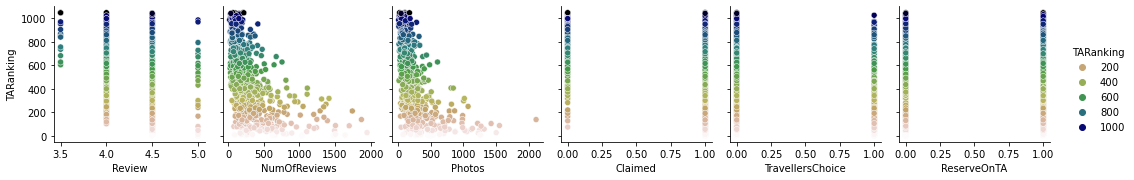

In [17]:
pp = sns.pairplot(data=new_train,
                  y_vars=['TARanking'],
                  x_vars=['Review', 'NumOfReviews', 'Photos','Claimed','TravellersChoice','ReserveOnTA'],
                  hue = "TARanking", palette = "gist_earth_r")
#i see correlation in my numerical features, but also heteroskedascity, so planning to take log of these two features

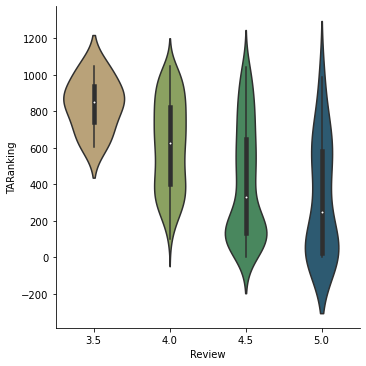

In [18]:
#plotting violinplots of categorical features to back up regression model
reviewplot = sns.catplot(x="Review", y="TARanking", kind="violin", data=new_train, palette = "gist_earth_r")

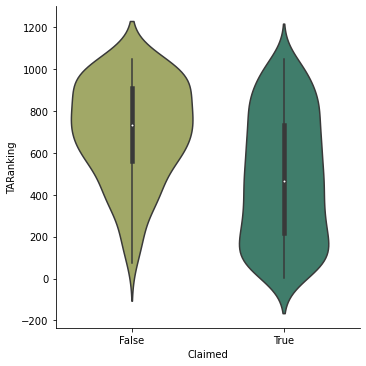

In [19]:
claimedplot = sns.catplot(x="Claimed", y="TARanking", kind="violin", data=new_train, palette = "gist_earth_r")

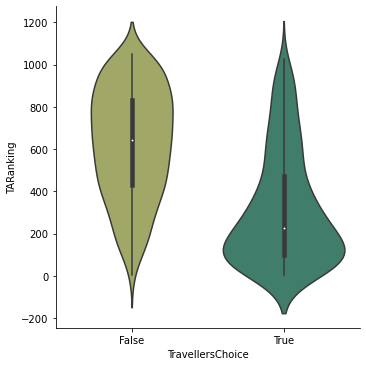

In [20]:
tchoiceplot = sns.catplot(x="TravellersChoice", y="TARanking", kind="violin", data=new_train, palette = "gist_earth_r")

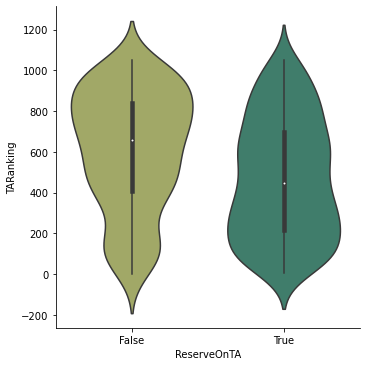

In [21]:
reserveplot = sns.catplot(x="ReserveOnTA", y="TARanking", kind="violin", data=new_train, palette = "gist_earth_r")

Text(0.5, 0, 'Prediction')

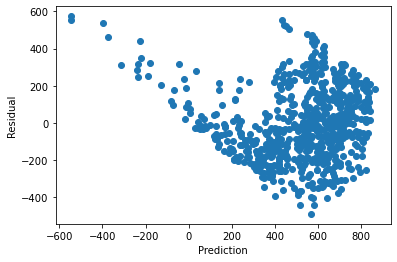

In [22]:
# Plot residuals vs. predictions
# heteroskedascity very apparent
fig = plt.scatter(results.predict(), results.resid)
fig.axes.set_ylabel('Residual')
fig.axes.set_xlabel('Prediction')

In [23]:
# slice data into features and target
# taking log of NumOfReviews and Photos features
X = new_train.drop(columns = ["TARanking"]).astype(float)
X["NumOfReviews"] = np.log(new_train['NumOfReviews'])
X["Photos"] = np.log(new_train['Photos'])
X = sm.add_constant(X)
y = new_train.loc[:, "TARanking"].astype(float) 

# fit model with target
model2 = sm.OLS(y, X, data = new_train) 

# fit our model 
results2 = model2.fit()
 
# summarize our model 
results2.summary()

#here I realize that I should take -X, since it makes sense to associate positive coefficients with positive ranking (as in lower ranking)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              TARanking   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     350.7
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          9.18e-205
Time:                        21:51:27   Log-Likelihood:                -4428.5
No. Observations:                 690   AIC:                             8871.
Df Residuals:                     683   BIC:                             8903.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3875.4671     99.836     38.818      0.000    3679.445    4071.490
Review            -469.3947     20.231    -23.202      0.000    -509.116    -429.673
NumOfReviews      -214.8381     11.046    -19.450      0.000    -236.526    -193.150
Photos             -33.2123     10.744     -3.091      0.002     -54.307     -12.117
Claimed            -30.3536     16.187     -1.875      0.061     -62.136       1.429
TravellersChoice   -69.6155     14.136     -4.925      0.000     -97.371     -41.860
ReserveOnTA        -34.9878     12.846     -2.724      0.007     -60.211      -9.764
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.652   Jarque-Bera (JB):                0.913
Skew:                           0.005   Prob(JB):                        0.633
Kurtosis:                       2.822   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# slice data into features and target
# taking log of NumOfReviews and Photos features
X = new_train.drop(columns = ["TARanking"]).astype(float)
X["NumOfReviews"] = np.log(new_train['NumOfReviews'])
X["Photos"] = np.log(new_train['Photos'])
X = -X
X = sm.add_constant(X)
y = new_train.loc[:, "TARanking"].astype(float) 

# fit model with target
model2 = sm.OLS(y, X, data = new_train) 

# fit our model 
results2 = model2.fit()
 
# summarize our model 
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              TARanking   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     350.7
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          9.18e-205
Time:                        21:51:32   Log-Likelihood:                -4428.5
No. Observations:                 690   AIC:                             8871.
Df Residuals:                     683   BIC:                             8903.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3875.4671     99.836     38.818      0.000    3679.445    4071.490
Review             469.3947     20.231     23.202      0.000     429.673     509.116
NumOfReviews       214.8381     11.046     19.450      0.000     193.150     236.526
Photos              33.2123     10.744      3.091      0.002      12.117      54.307
Claimed             30.3536     16.187      1.875      0.061      -1.429      62.136
TravellersChoice    69.6155     14.136      4.925      0.000      41.860      97.371
ReserveOnTA         34.9878     12.846      2.724      0.007       9.764      60.211
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.652   Jarque-Bera (JB):                0.913
Skew:                           0.005   Prob(JB):                        0.633
Kurtosis:                       2.822   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Prediction')

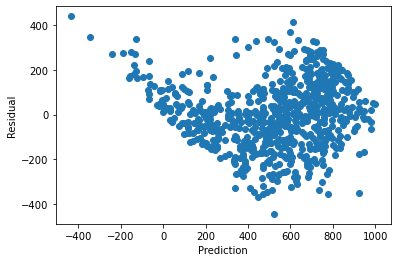

In [25]:
# Plot residuals vs. predictions
fig = plt.scatter(results2.predict(), results2.resid)
fig.axes.set_ylabel('Residual')
fig.axes.set_xlabel('Prediction')

# looking a little better

In [26]:
#remove number of photos because feature collinearity
# slice data into features and target
# taking log of NumOfReviews feature
new_train = new_train.drop(columns = ["Photos"])
X = new_train.drop(columns = ["TARanking"]).astype(float)
X["NumOfReviews"] = np.log(new_train['NumOfReviews'])
X = -X
X = sm.add_constant(X)
y = new_train.loc[:, "TARanking"].astype(float) 

# fit model with target
modelfinal = sm.OLS(y, X, data = new_train) 

# fit our model 
resultsfinal = modelfinal.fit()
 
# summarize our model 
resultsfinal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              TARanking   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     413.7
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          4.89e-204
Time:                        21:51:36   Log-Likelihood:                -4433.3
No. Observations:                 690   AIC:                             8879.
Df Residuals:                     684   BIC:                             8906.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3912.6090     99.728     39.233      0.000    3716.798    4108.420
Review             484.1480     19.782     24.474      0.000     445.307     522.989
NumOfReviews       240.9062      7.179     33.559      0.000     226.811     255.001
Claimed             31.9834     16.279      1.965      0.050       0.020      63.947
TravellersChoice    74.5498     14.133      5.275      0.000      46.800     102.299
ReserveOnTA         35.5388     12.925      2.750      0.006      10.161      60.917
==============================================================================
Omnibus:                        0.240   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.887   Jarque-Bera (JB):                0.341
Skew:                           0.002   Prob(JB):                        0.843
Kurtosis:                       2.891   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print(X)

     const  Review  NumOfReviews  Claimed  TravellersChoice  ReserveOnTA
                                                                        
566    1.0    -4.5     -4.174387     -1.0              -1.0         -1.0
444    1.0    -4.0     -6.068426     -1.0              -0.0         -1.0
965    1.0    -4.0     -4.624973     -1.0              -0.0         -0.0
107    1.0    -4.5     -6.784457     -1.0              -1.0         -1.0
464    1.0    -4.5     -5.332719     -1.0              -0.0         -1.0
..     ...     ...           ...      ...               ...          ...
706    1.0    -4.0     -5.147494     -0.0              -0.0         -0.0
235    1.0    -4.5     -5.129899     -1.0              -1.0         -1.0
192    1.0    -4.5     -5.872118     -1.0              -1.0         -1.0
106    1.0    -4.5     -6.335054     -1.0              -1.0         -1.0
136    1.0    -4.5     -5.262690     -1.0              -0.0         -1.0

[690 rows x 6 columns]


In [28]:
resultsfinal.predict(X)


566    586.235107
444    446.573232
965    829.848767
107    -42.546977
464    381.735580
          ...    
706    735.953405
235    356.046443
192    177.241241
106     65.716962
136    398.605907
Length: 690, dtype: float64

In [29]:
test = test.drop(['NameLength','Avg$PerPax','ZipCode','Michelin','Photos'], axis = 1)

In [30]:
Xtest = test.drop(columns = ["TARanking"]).astype(float)
Xtest["NumOfReviews"] = np.log(test['NumOfReviews'])
Xtest = -Xtest
Xtest = sm.add_constant(Xtest)

In [31]:
print(Xtest)

      const  Review  NumOfReviews  Claimed  TravellersChoice  ReserveOnTA
                                                                         
574     1.0    -4.5     -4.060443     -0.0              -0.0         -0.0
393     1.0    -4.0     -5.808142     -0.0              -1.0         -1.0
99      1.0    -4.5     -4.691348     -1.0              -1.0         -0.0
1039    1.0    -4.0     -4.882802     -1.0              -0.0         -0.0
97      1.0    -4.5     -5.843544     -1.0              -1.0         -1.0
...     ...     ...           ...      ...               ...          ...
299     1.0    -4.0     -6.795706     -1.0              -1.0         -1.0
767     1.0    -4.5     -3.713572     -1.0              -0.0         -0.0
982     1.0    -4.0     -4.110874     -1.0              -1.0         -1.0
512     1.0    -3.5     -6.699500     -0.0              -0.0         -0.0
990     1.0    -4.0     -4.317488     -1.0              -0.0         -0.0

[296 rows x 6 columns]


In [32]:
ypred = resultsfinal.predict(Xtest)

In [33]:
ypred


574     755.756875
393     466.710660
99      497.234836
1039    767.736127
97      184.124745
           ...    
299     196.817143
767     807.336883
982     843.609888
512     604.139523
990     903.923748
Length: 296, dtype: float64

In [34]:
df.loc[99]

Review                  4.5
TARanking                99
NameLength               17
Avg$PerPax              2.5
NumOfReviews            109
Photos                  252
ZipCode             78884.0
Claimed                True
Michelin              False
TravellersChoice       True
ReserveOnTA           False
Name: 99, dtype: object